In [ ]:

import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
from scipy.signal import medfilt
from scipy.signal import lfilter
from scipy import signal
from scipy import optimize
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("./test3.csv")
df
t = np.array(df["time"])


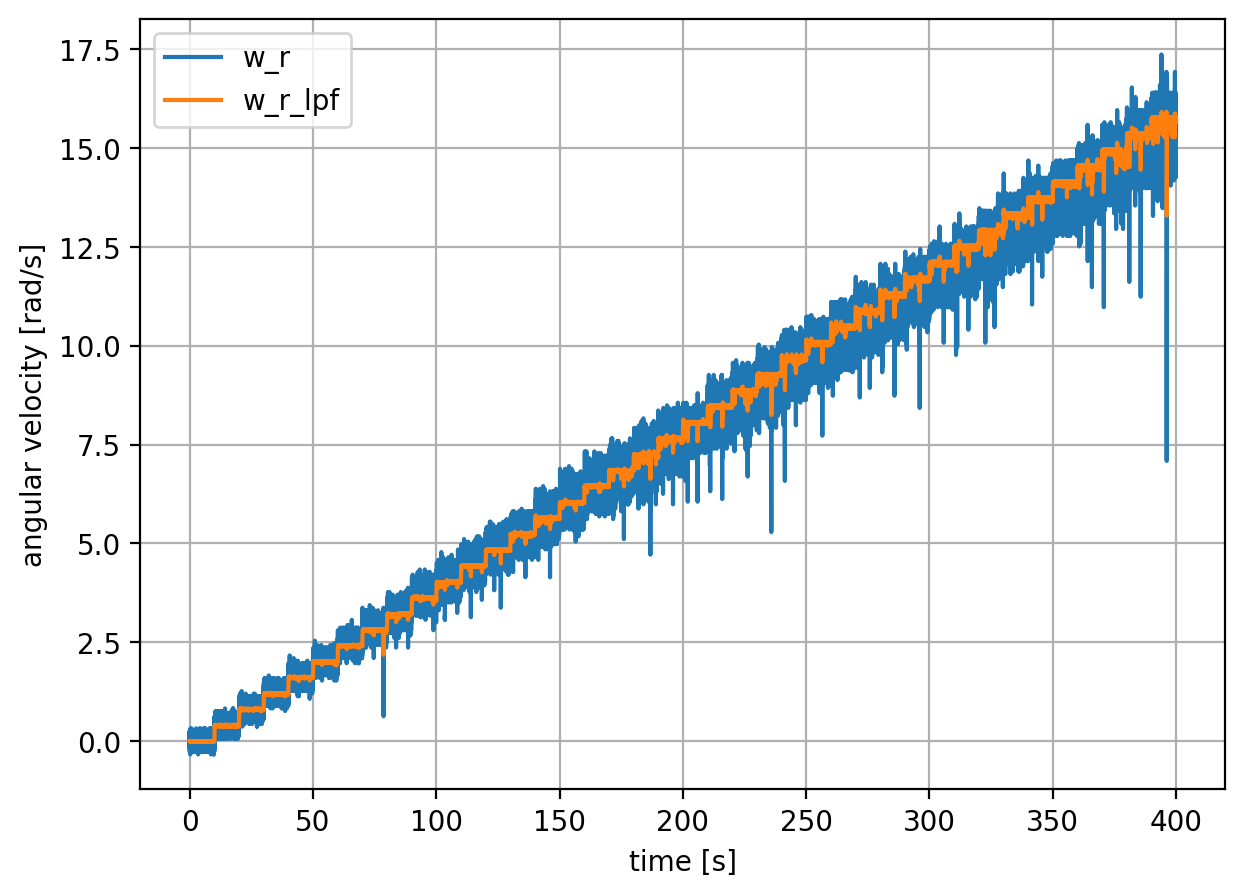

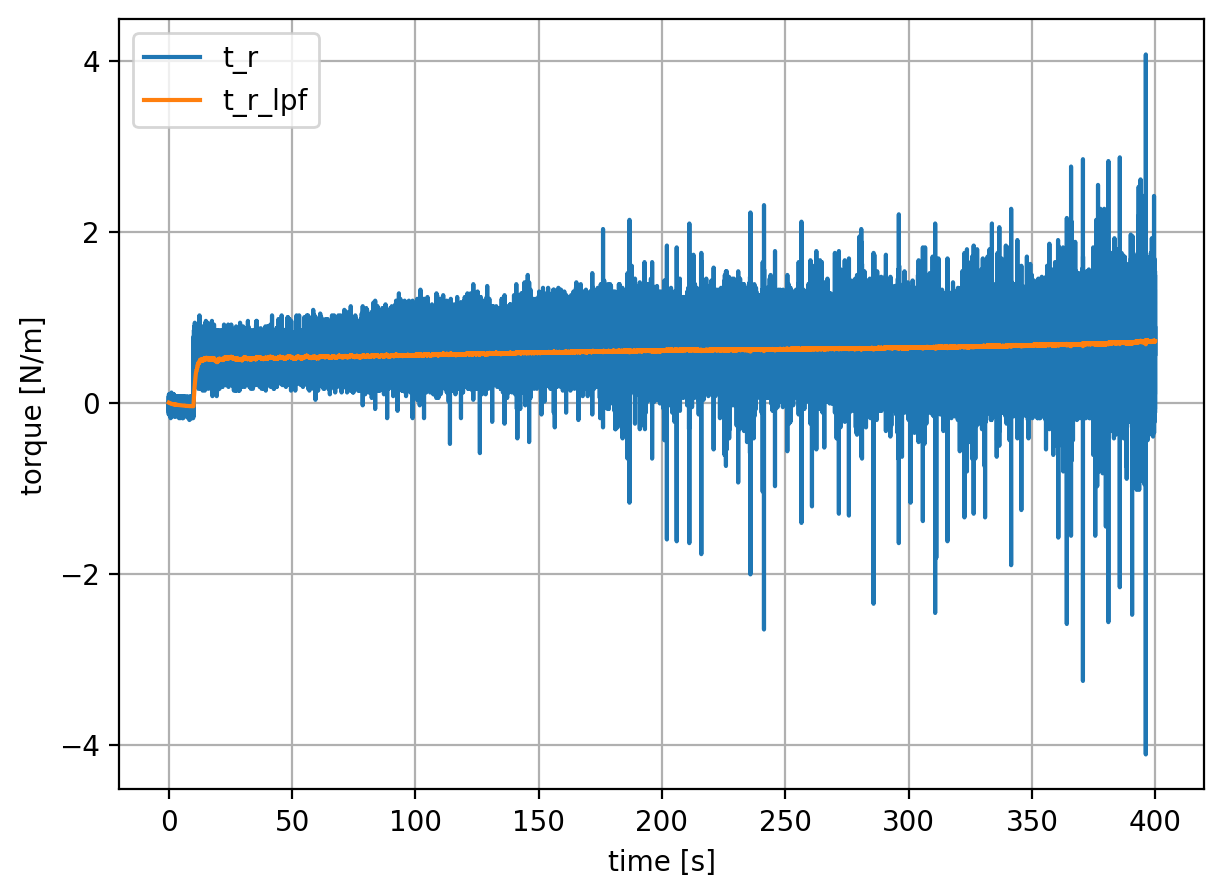

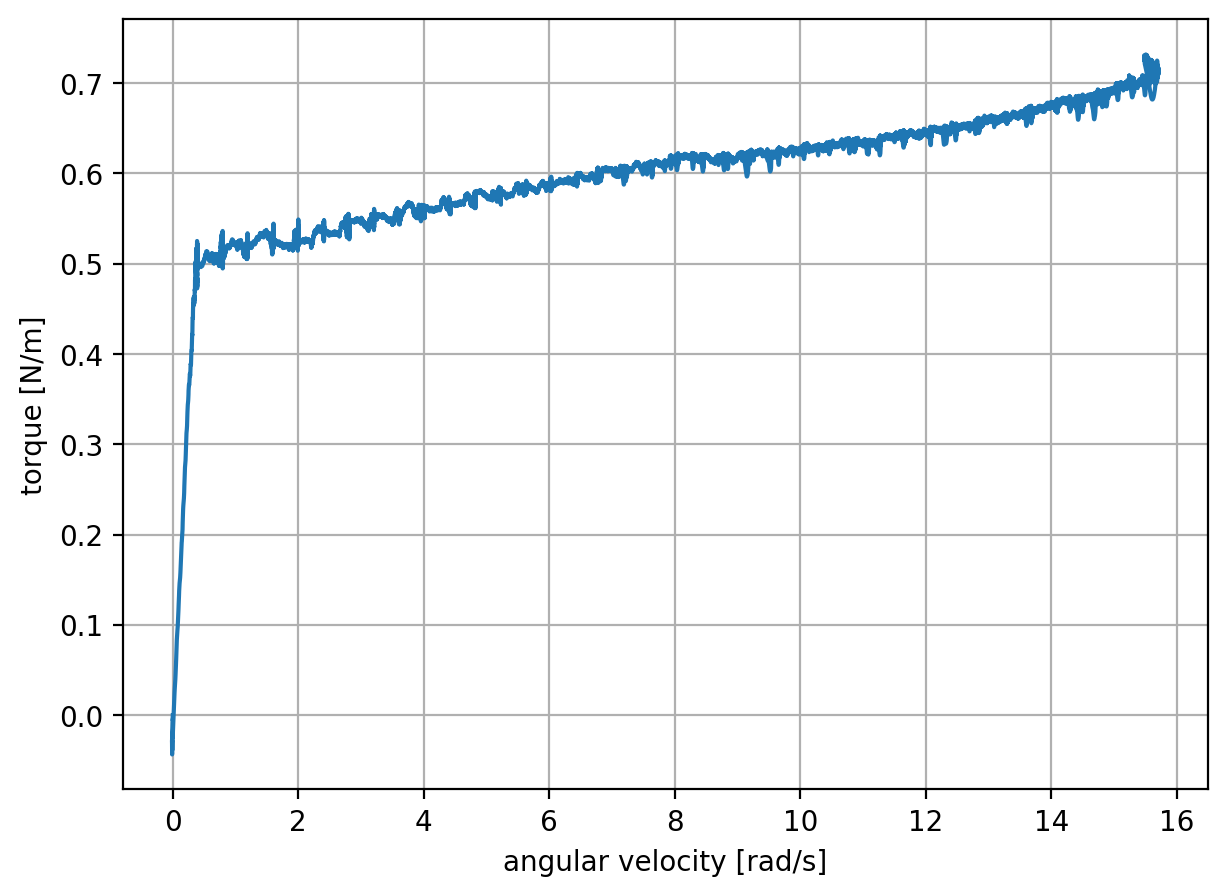

In [38]:
# %matplotlib
w_r = np.array(df[' w_r'])
t = np.linspace(0, w_r.shape[0]*0.001, w_r.shape[0])

T = 0.001
wc = 0.02
lpf = signal.bilinear([wc], [1, wc])
w_r_smooth = lfilter(lpf[0], lpf[1], w_r)

fig = plt.figure(figsize=(7, 5), dpi=200)

plt.plot(t, w_r, label="w_r")
plt.plot(t, w_r_smooth, label="w_r_lpf")
plt.xlabel("time [s]")
plt.ylabel("angular velocity [rad/s]")
plt.legend()
plt.grid()
plt.show()

wc = 0.001
lpf = signal.bilinear([wc], [1, wc])
w_r_smooth = lfilter(lpf[0], lpf[1], w_r)
t_r = np.array(df[' t_r'])
t_r_smooth = lfilter(lpf[0], lpf[1], t_r)

fig = plt.figure(figsize=(7, 5), dpi=200)
plt.plot(t, t_r, label="t_r")
plt.plot(t, t_r_smooth, label="t_r_lpf")
plt.xlabel("time [s]")
plt.ylabel("torque [N/m]")
plt.legend()
plt.grid()
plt.show()

fig = plt.figure(figsize=(7, 5), dpi=200)
plt.plot(w_r_smooth, t_r_smooth)
plt.ylabel("torque [N/m]")
plt.xlabel("angular velocity [rad/s]")
plt.grid()
plt.show()

In [29]:
def stribeck_model(v, F_brk, v_brk, F_c, vis_ft):
    v_st = v_brk * np.sqrt(2)
    v_coul = v_brk/10
    e = np.exp(1)
    if (F_brk-F_c < 0):
        return -100
    else:
        F = np.sqrt(F_brk - F_c)*np.exp(-(v/v_st)**2)*v/v_st + F_c * np.tanh(v/v_coul) + vis_ft*v
    return F

popt, pcov = optimize.curve_fit(stribeck_model, w_r_smooth, t_r_smooth, bounds=(0, np.inf))

[0.50721099 1.93930257 0.50721096 0.01211592]


/home/guanlunlu/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


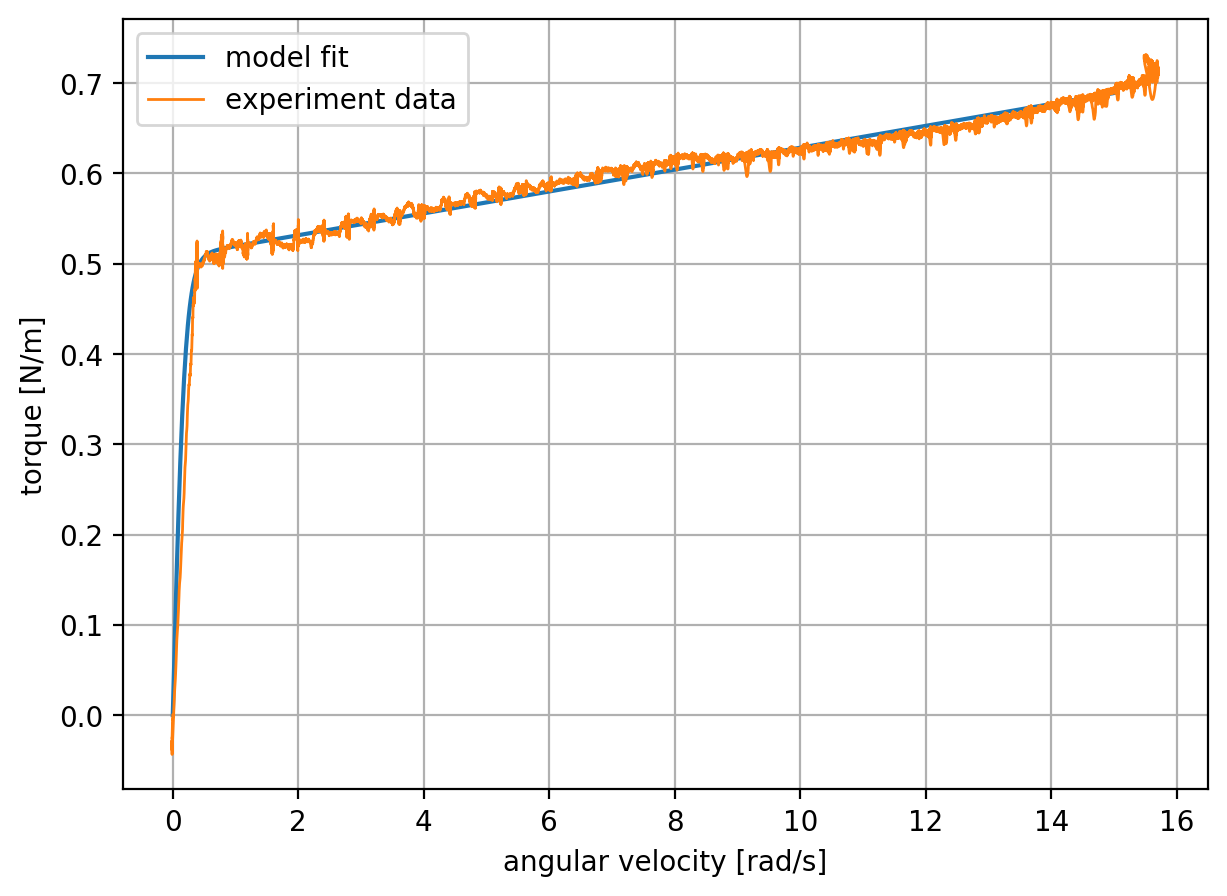

In [43]:
print(popt)
w_fit = np.linspace(0,15,1000)
t_fit = []
for w in w_fit:
    t_fit.append(stribeck_model(w, popt[0], popt[1], popt[2], popt[3]))

fig = plt.figure(figsize=(7, 5), dpi=200)
plt.plot(w_fit, t_fit, label="model fit")
plt.plot(w_r_smooth, t_r_smooth, linewidth=1, label="experiment data")
plt.ylabel("torque [N/m]")
plt.xlabel("angular velocity [rad/s]")
plt.legend()
plt.grid()
plt.show()



In [ ]:
w_l = np.array(df[' w_l'])
w_l_smooth = savgol_filter(w_l, 20, 3)
w_l_smooth_2 = medfilt(w_l, kernel_size=31)
plt.plot(w_l)
plt.plot(w_l_smooth)
plt.plot(w_l_smooth_2)
plt.show()

t_l = np.array(df[' t_l'])
t_l_smooth = savgol_filter(t_l, 400, 3)
plt.plot(t_l)
plt.plot(t_l_smooth)
plt.show()

plt.plot(w_l_smooth, t_r_smooth)
plt.plot(w_l_smooth_2, t_r_smooth)
plt.show()